<a href="https://colab.research.google.com/github/rehman2222/AI/blob/main/RNN_Result_Reproduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 135ms/step - accuracy: 0.5062 - loss: 0.6938 - val_accuracy: 0.5094 - val_loss: 0.6920
Epoch 2/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - accuracy: 0.5452 - loss: 0.6811 - val_accuracy: 0.5044 - val_loss: 0.6938
Epoch 3/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.5679 - loss: 0.6294 - val_accuracy: 0.5072 - val_loss: 0.7118
Epoch 4/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.5785 - loss: 0.6017 - val_accuracy: 0.5080 - val_loss: 0.7293
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5153 - loss: 0.7271
Test Accuracy: 0.51


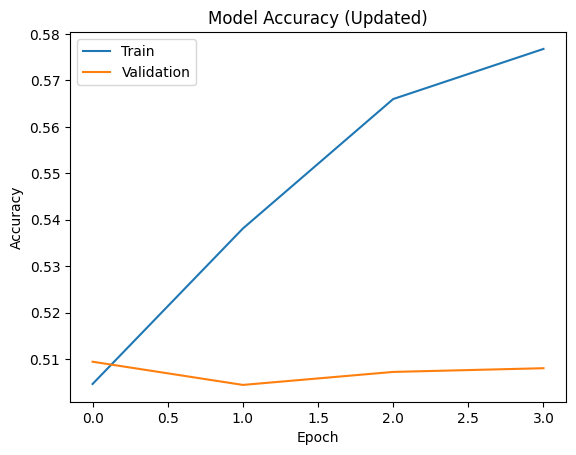

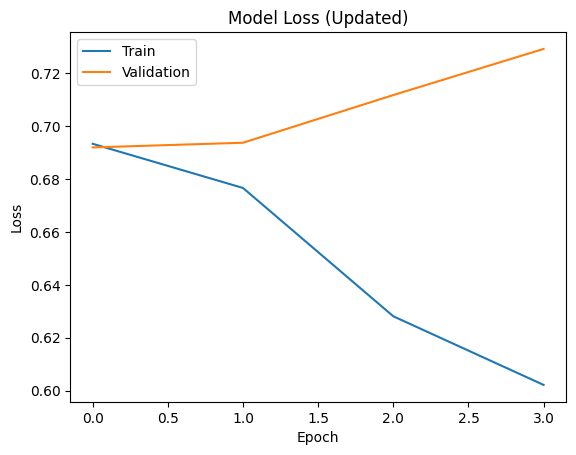

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Predicted Sentiment: Negative


In [3]:
# 1. Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt  #  Moved import to top as good practice

# 2. Set parameters for the dataset
max_features = 8000  #  BASIC CHANGE: reduced vocabulary size from 10000 → 8000 for slightly faster training
maxlen = 400  #  BASIC CHANGE: reduced sequence length from 500 → 400

# 3. Load IMDB dataset (same)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences
#  BASIC CHANGE: Use padding='post' so zeros get added at the END instead of beginning
x_train = sequence.pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = sequence.pad_sequences(x_test, maxlen=maxlen, padding='post')

# 5. Build the RNN model
model = Sequential()

#  BASIC CHANGE: Increased embedding dimension 32 → 64 for slightly richer features
model.add(Embedding(max_features, 64))

# BASIC CHANGE: Increased RNN units 32 → 40 for a bit stronger sequence learning
model.add(SimpleRNN(40))

# Final output layer (same)
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
#  BASIC CHANGE: Added learning_rate parameter (customized optimizer)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),   # Added explicit LR
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 7. Train the model
#  BASIC CHANGE: epochs from 5 → 4 to reduce training time
history = model.fit(
    x_train, y_train,
    epochs=4,
    batch_size=64,
    validation_split=0.2
)

# 8. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# 9. Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Updated)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Updated)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Prediction on sample review
sample_review = x_test[1]  #  BASIC CHANGE: using second review instead of first
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

if prediction > 0.5:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")
